In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

# Veri setini yükleyin (diabetes.csv dosyası olarak)
file_path = 'diabetes.csv'  # Veri setinizin dosya adı
data = pd.read_csv(file_path)  # Veri setini yükleyin

# Veri setini inceleyin
data.head()  # Veri setinin ilk birkaç satırını göstermek için


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
# Eksik değerleri kontrol etme
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#eksik değerleri ortalama ile doldurma
data.fillna(data.mean(), inplace=True)

In [5]:
# Özellikler ve etiketler arasında ayrım yap
from collections import Counter  
X = data.drop("Outcome", axis=1)  # Özellikler
y = data["Outcome"]  # Etiketler

# Sınıf dağılımını özetleme
counter = Counter(y)
print(counter)

Counter({0: 500, 1: 268})


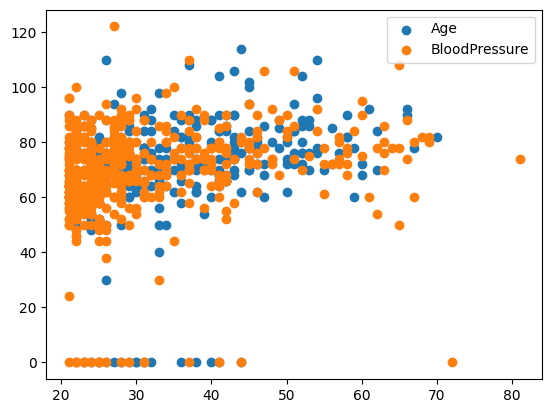

In [6]:
# scatter plot of examples by class label
import matplotlib.pyplot as plt
for label, _ in counter.items():
    row_ix = y[y == label].index
    plt.scatter(X.loc[row_ix, 'Age'], X.loc[row_ix, 'BloodPressure'], label=str(label))
plt.legend(['Age', 'BloodPressure'])
plt.show()

In [7]:
# Veri kümesini ayır
from imblearn.over_sampling import SMOTE, KMeansSMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import EditedNearestNeighbours, AllKNN, InstanceHardnessThreshold, NearMiss, NeighbourhoodCleaningRule, OneSidedSelection, RandomUnderSampler, TomekLinks
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Özellikler ve etiketler arasında ayrım yap
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aşırı örnekleme tekniklerini uygula
oversamplers = [SMOTE(), KMeansSMOTE(), RandomOverSampler(), ADASYN(), BorderlineSMOTE(), SVMSMOTE()]

for oversampler in oversamplers:
    # Veri kümesini aşırı örnekle
    X_oversampled, y_oversampled = oversampler.fit_resample(X_train, y_train)

    # Modeli eğit
    model = RandomForestClassifier()
    model.fit(X_oversampled, y_oversampled)

    # Modelin performansını değerlendir
    accuracy = model.score(X_test, y_test)
    print(f"{oversampler.__class__.__name__}: {accuracy:.2f}")

# Düşük örnekleme tekniklerini uygula
undersamplers = [EditedNearestNeighbours(), AllKNN(), InstanceHardnessThreshold(), NearMiss(), NeighbourhoodCleaningRule(), OneSidedSelection(), RandomUnderSampler(), TomekLinks()]

for undersampler in undersamplers:
    # Veri kümesini düşük örnekle
    X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

    # Modeli eğit
    model = RandomForestClassifier()
    model.fit(X_undersampled, y_undersampled)

    # Modelin performansını değerlendir
    accuracy = model.score(X_test, y_test)
    print(f"{undersampler.__class__.__name__}: {accuracy:.2f}")

SMOTE: 0.76


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


KMeansSMOTE: 0.73
RandomOverSampler: 0.75
ADASYN: 0.71
BorderlineSMOTE: 0.74
SVMSMOTE: 0.73
EditedNearestNeighbours: 0.68
AllKNN: 0.65
InstanceHardnessThreshold: 0.66
NearMiss: 0.74
NeighbourhoodCleaningRule: 0.70
OneSidedSelection: 0.76
RandomUnderSampler: 0.75
TomekLinks: 0.73


In [8]:
#Visualization Steps
# check version number
import imblearn
print(imblearn.__version__)

0.11.0


Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


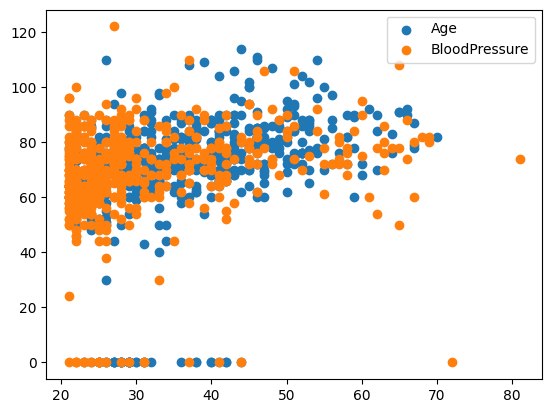

In [9]:
# Sınıf dağılımını özetleme
counter = Counter(y)
print(counter)

# SMOTE ile aşırı örnekleme yapma
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Örnek sınıf dağılımını özetleme
counter_resampled = Counter(y_resampled)
print(counter_resampled)

# scatter plot of examples by class label
for label, _ in counter_resampled.items():
    row_ix = y_resampled[y_resampled == label].index
    plt.scatter(X_resampled.loc[row_ix, 'Age'], X_resampled.loc[row_ix, 'BloodPressure'], label=f'Class {label}')

plt.legend(['Age', 'BloodPressure'])
plt.show()

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy='auto')  # Use 'auto' to automatically balance the data
under = RandomUnderSampler(sampling_strategy='auto')  # Use 'auto' to automatically balance the data
steps = [('u', under),('o', over)]
# Pipeline oluşturma
pipeline = Pipeline(steps=steps)
# transform the dataset
X_resampled, y_resampled = pipeline.fit_resample(X, y)

Counter({0: 500, 1: 268})


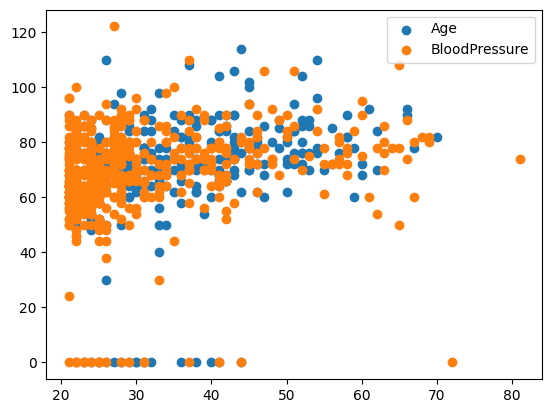

In [11]:
# summarize the new class distribution
import matplotlib.pyplot as plt
import numpy as np 
counter = Counter(y)
print(counter)  # Print the class distribution

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X.loc[row_ix, 'Age'], X.loc[row_ix, 'BloodPressure'], label=str(label))  

plt.legend(['Age', 'BloodPressure'])
plt.show()

In [12]:
# define model
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

In [13]:
import numpy as np
import statistics
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.669


In [14]:
# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

In [15]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.677


In [16]:
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy='auto')
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.683


In [17]:
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
 # define pipeline
 model = DecisionTreeClassifier()
 over = SMOTE(sampling_strategy='auto', k_neighbors=k)
 under = RandomUnderSampler(sampling_strategy='auto')
 steps = [('over', over), ('under', under), ('model', model)]
 pipeline = Pipeline(steps=steps)
 # evaluate pipeline
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
 score = np.mean(scores)
 print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.674
> k=2, Mean ROC AUC: 0.650
> k=3, Mean ROC AUC: 0.672
> k=4, Mean ROC AUC: 0.673
> k=5, Mean ROC AUC: 0.672
> k=6, Mean ROC AUC: 0.659
> k=7, Mean ROC AUC: 0.678


Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


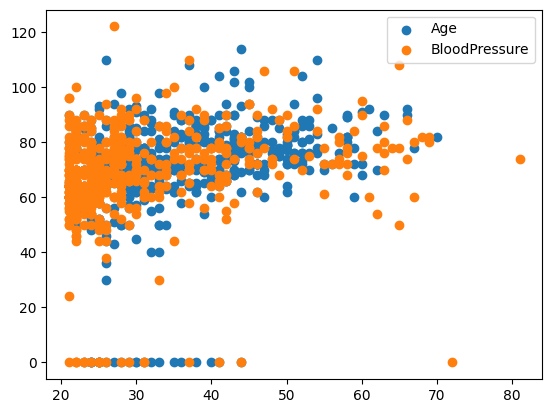

In [18]:
# Sınıf dağılımını özetleme
counter = Counter(y)
print(counter)

# SMOTE ile aşırı örnekleme yapma
oversample = BorderlineSMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Örnek sınıf dağılımını özetleme
counter_resampled = Counter(y_resampled)
print(counter_resampled)

# scatter plot of examples by class label
for label, _ in counter_resampled.items():
    row_ix = y_resampled[y_resampled == label].index
    plt.scatter(X_resampled.loc[row_ix, 'Age'], X_resampled.loc[row_ix, 'BloodPressure'], label=f'Class {label}')

plt.legend(['Age', 'BloodPressure'])
plt.show()

Counter({0: 500, 1: 268})
Counter({1: 500, 0: 500})


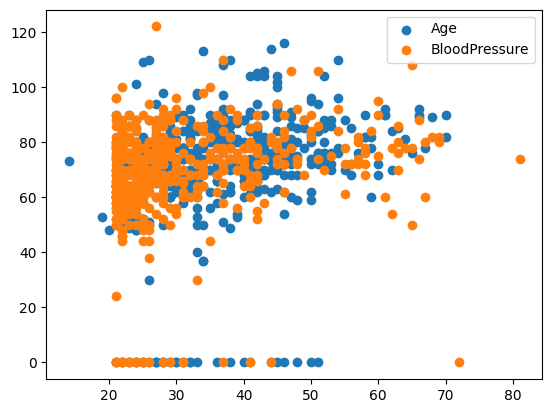

In [19]:
# Sınıf dağılımını özetleme
counter = Counter(y)
print(counter)

# SMOTE ile aşırı örnekleme yapma
oversample = SVMSMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Örnek sınıf dağılımını özetleme
counter_resampled = Counter(y_resampled)
print(counter_resampled)

# scatter plot of examples by class label
for label, _ in counter_resampled.items():
    row_ix = y_resampled[y_resampled == label].index
    plt.scatter(X_resampled.loc[row_ix, 'Age'], X_resampled.loc[row_ix, 'BloodPressure'], label=f'Class {label}')

plt.legend(['Age', 'BloodPressure'])
plt.show()

Counter({0: 500, 1: 268})
Counter({0: 500, 1: 474})


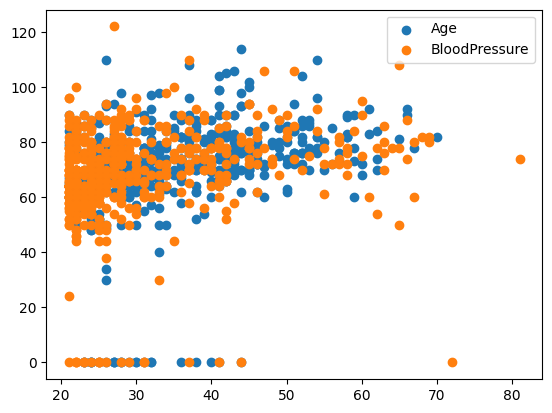

In [20]:
# Sınıf dağılımını özetleme
counter = Counter(y)
print(counter)

# SMOTE ile aşırı örnekleme yapma
oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Örnek sınıf dağılımını özetleme
counter_resampled = Counter(y_resampled)
print(counter_resampled)

# scatter plot of examples by class label
for label, _ in counter_resampled.items():
    row_ix = y_resampled[y_resampled == label].index
    plt.scatter(X_resampled.loc[row_ix, 'Age'], X_resampled.loc[row_ix, 'BloodPressure'], label=f'Class {label}')

plt.legend(['Age', 'BloodPressure'])
plt.show()

In [47]:
# X ve y'yi ayırın
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, concatenate, Input
from keras.optimizers import Adam

X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Veriyi eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2>With SMOTE and ADASYN</h2>

In [112]:
# Aşırı örnekleme tekniklerini uygulayın (SMOTE veya ADASYN)
from sklearn.metrics import accuracy_score, classification_report

# SMOTE uygulayın
smote = SMOTE(sampling_strategy='auto')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

# ADASYN uygulayın
adasyn = ADASYN(sampling_strategy='auto')
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
X_test_adasyn, y_test_adasyn = adasyn.fit_resample(X_test, y_test)

# SMOTE ve ADASYN sonuçlarını birleştirin
X_train_resampled = np.vstack((X_train_smote, X_train_adasyn))
y_train_resampled = np.concatenate((y_train_smote, y_train_adasyn))

# SMOTE ve ADASYN sonuçlarını birleştirin
X_test_resampled = np.vstack((X_test_smote, X_test_adasyn))
y_test_resampled = np.concatenate((y_test_smote, y_test_adasyn))


<h2>KNN:</h2>

In [109]:
model_KNN_1 = KNeighborsClassifier()
history_KNN_1 = model_KNN_1.fit(X_train_resampled, y_train_resampled)
y_pred_KNN_1 = model_KNN_1.predict(X_test_resampled)
accuracy_KNN_1 = accuracy_score(y_test_resampled, y_pred_KNN_1)
print(classification_report(y_test_resampled, y_pred_KNN_1))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66       198
           1       0.67      0.75      0.71       205

    accuracy                           0.68       403
   macro avg       0.68      0.68      0.68       403
weighted avg       0.68      0.68      0.68       403



<h2>RandomForest:</h2>

In [108]:
model_rf_1 = RandomForestClassifier()
history_rf_1 = model_rf_1.fit(X_train_resampled, y_train_resampled)
y_pred_rf_1 = model_rf_1.predict(X_test_resampled)
accuracy_rf_1 = accuracy_score(y_test_resampled, y_pred_rf_1)
print(classification_report(y_test_resampled, y_pred_rf_1))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       198
           1       0.74      0.77      0.75       205

    accuracy                           0.75       403
   macro avg       0.75      0.75      0.75       403
weighted avg       0.75      0.75      0.75       403



<h2>XGBoost:</h2>

In [110]:
model_xgb_1 = XGBClassifier()
history_xgb_1 = model_xgb_1.fit(X_train_resampled, y_train_resampled)
y_pred_xgb_1 = model_xgb_1.predict(X_test_resampled)
accuracy_xgb_1 = accuracy_score(y_test_resampled, y_pred_xgb_1)
print(classification_report(y_test_resampled, y_pred_xgb_1))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       198
           1       0.75      0.81      0.78       205

    accuracy                           0.76       403
   macro avg       0.77      0.76      0.76       403
weighted avg       0.77      0.76      0.76       403



<h2>LightGBM:</h2>

In [111]:
model_lgbm_1 = LGBMClassifier()
history_lgbm_1 = model_lgbm_1.fit(X_train_resampled, y_train_resampled)
y_pred_lgbm_1 = model_lgbm_1.predict(X_test_resampled)
accuracy_lgbm_1 = accuracy_score(y_test_resampled, y_pred_lgbm_1)
print(classification_report(y_test_resampled, y_pred_lgbm_1))

[LightGBM] [Info] Number of positive: 781, number of negative: 802
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1848
[LightGBM] [Info] Number of data points in the train set: 1583, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493367 -> initscore=-0.026533
[LightGBM] [Info] Start training from score -0.026533
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       198
           1       0.75      0.78      0.77       205

    accuracy                           0.76       403
   macro avg       0.76      0.76      0.76       403
weighted avg       0.76      0.76      0.76       403



<h2>LSTM:</h2>

Epoch 1/10
50/50 [==============================] - 2s 11ms/step - loss: 0.6896 - accuracy: 0.5351 - val_loss: 0.6721 - val_accuracy: 0.6849
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6804 - val_loss: 0.6270 - val_accuracy: 0.7047
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.6822 - val_loss: 0.5934 - val_accuracy: 0.6948
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.6911 - val_loss: 0.5893 - val_accuracy: 0.6923
Epoch 5/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5922 - accuracy: 0.6898 - val_loss: 0.5887 - val_accuracy: 0.6923
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5919 - accuracy: 0.6892 - val_loss: 0.5878 - val_accuracy: 0.6898
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6898 - val_loss: 0.5869 - val_accuracy: 0.6898
Epoch 8/10
50/50 [=

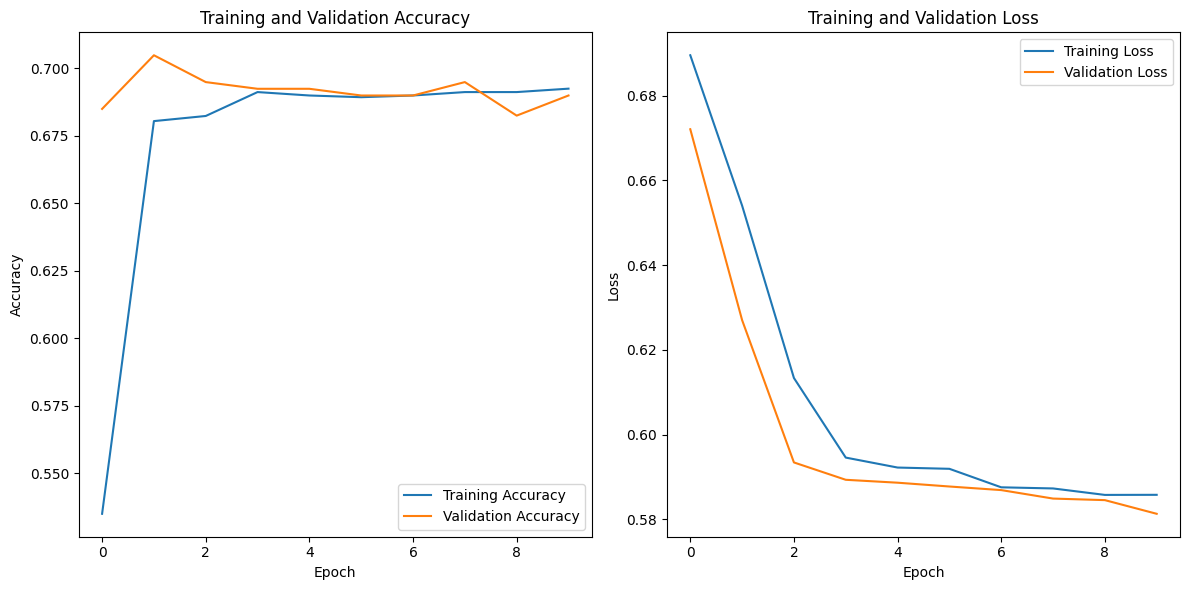

13/13 [==============================] - 0s 2ms/step
Accuracy: 0.6898263027295285


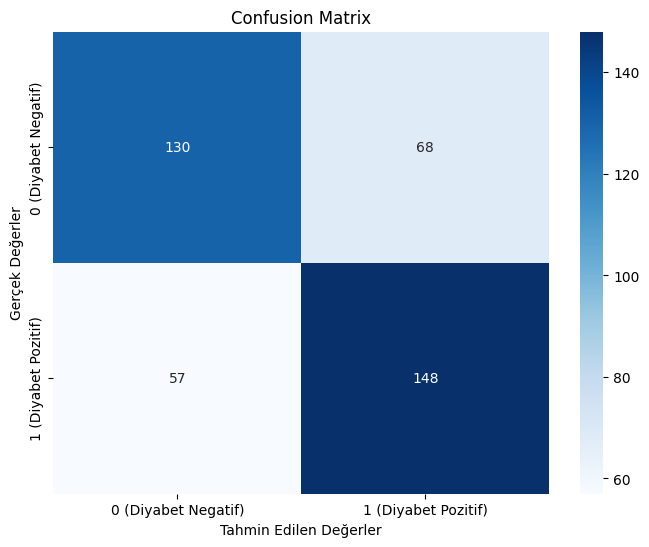

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       198
           1       0.69      0.72      0.70       205

    accuracy                           0.69       403
   macro avg       0.69      0.69      0.69       403
weighted avg       0.69      0.69      0.69       403



In [162]:
lstm_model = Sequential()
lstm_model.add(LSTM(16, input_shape=(X_train_resampled.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# L1 Regularization
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', loss_weights=[1.0, 0.01], metrics=['accuracy'])

# L2 Regularization
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', loss_weights=[1.0, 0.001], metrics=['accuracy'])

# Liste oluşturarak epoch sonuçlarını saklamak için
history = lstm_model.fit(X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1)),
                         y_train_resampled,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)), y_test_resampled))

# Accuracy ve loss değerlerini çizmek için
plt.figure(figsize=(12, 6))

# Accuracy değerleri
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss değerleri
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# LSTM modelin tahminlerini alın
y_pred_lstm = (lstm_model.predict(X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1))) > 0.5).astype(int)

# Karmaşıklık matrisini oluşturun
cm = confusion_matrix(y_test_resampled, y_pred_lstm)

# Karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')

# Print Accuracy
accuracy_lstm_1 = accuracy_score(y_test_resampled, y_pred_lstm)
print("Accuracy:", accuracy_lstm_1)
plt.show()
print(classification_report(y_test_resampled, y_pred_lstm))

<h2>GRU:</h2>

Epoch 1/10
50/50 [==============================] - 2s 13ms/step - loss: 0.6010 - accuracy: 0.6804 - val_loss: 0.5782 - val_accuracy: 0.6953
Epoch 2/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5876 - accuracy: 0.6915 - val_loss: 0.5741 - val_accuracy: 0.7066
Epoch 3/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5826 - accuracy: 0.6851 - val_loss: 0.5713 - val_accuracy: 0.6929
Epoch 4/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5809 - accuracy: 0.6865 - val_loss: 0.5687 - val_accuracy: 0.6824
Epoch 5/10
50/50 [==============================] - 0s 5ms/step - loss: 0.5754 - accuracy: 0.6907 - val_loss: 0.5634 - val_accuracy: 0.7066
Epoch 6/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.6922 - val_loss: 0.5626 - val_accuracy: 0.7227
Epoch 7/10
50/50 [==============================] - 0s 4ms/step - loss: 0.5725 - accuracy: 0.6923 - val_loss: 0.5581 - val_accuracy: 0.7066
Epoch 8/10
50/50 [=

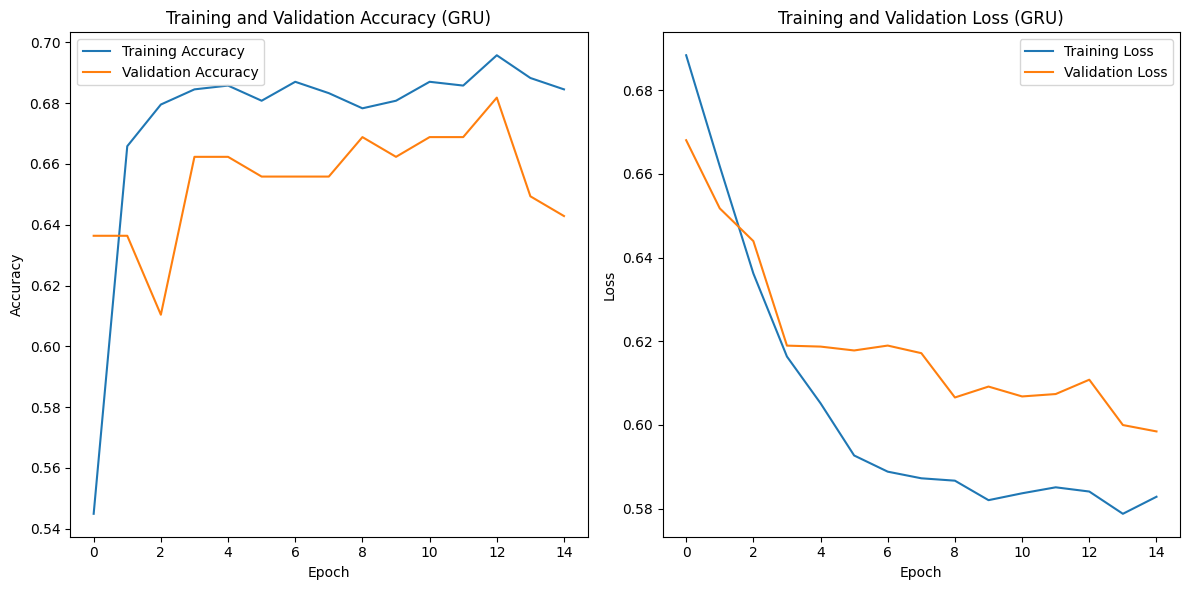

13/13 [==============================] - 0s 2ms/step


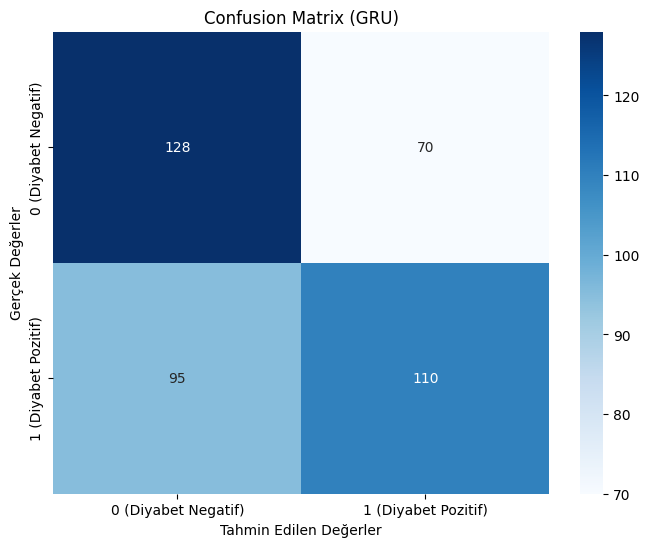


GRU Model:
Accuracy: 0.5905707196029777
              precision    recall  f1-score   support

           0       0.57      0.65      0.61       198
           1       0.61      0.54      0.57       205

    accuracy                           0.59       403
   macro avg       0.59      0.59      0.59       403
weighted avg       0.59      0.59      0.59       403



In [161]:
gru_model = Sequential()
gru_model.add(GRU(16, input_shape=(X_train_resampled.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

# L1 Regularization
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# L2 Regularization
# gru_model.compile(loss='binary_crossentropy', optimizer='adam', kernel_regularizer='l2', metrics=['accuracy'])

# Liste oluşturarak epoch sonuçlarını saklamak için
history = lstm_model.fit(X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1)),
                         y_train_resampled,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)), y_test_resampled))

# Accuracy ve loss değerlerini çizmek için
plt.figure(figsize=(12, 6))

# Accuracy değerleri
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()

# Loss değerleri
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (GRU)')
plt.legend()

plt.tight_layout()
plt.show()

# GRU modelin tahminlerini alın
y_pred_gru = (gru_model.predict(X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1))) > 0.5).astype(int)

# Karmaşıklık matrisini oluşturun
cm_gru = confusion_matrix(y_test_resampled, y_pred_gru)

# Karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix (GRU)')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.show()

accuracy_gru_1 = accuracy_score(y_test_resampled, y_pred_gru)
print("\nGRU Model:")
print("Accuracy:", accuracy_gru_1)
print(classification_report(y_test_resampled, y_pred_gru))

<h2>Ensembled Learning</h2>

Epoch 1/10
50/50 [==============================] - 4s 7ms/step - loss: 0.5611 - accuracy: 0.7069
Epoch 2/10
50/50 [==============================] - 0s 7ms/step - loss: 0.5136 - accuracy: 0.7372
Epoch 3/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4904 - accuracy: 0.7549
Epoch 4/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4763 - accuracy: 0.7789
Epoch 5/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4675 - accuracy: 0.7776
Epoch 6/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4596 - accuracy: 0.7821
Epoch 7/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4528 - accuracy: 0.7840
Epoch 8/10
50/50 [==============================] - 0s 8ms/step - loss: 0.4438 - accuracy: 0.7896
Epoch 9/10
50/50 [==============================] - 0s 7ms/step - loss: 0.4314 - accuracy: 0.7979
Epoch 10/10
13/13 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.6998

Ensemble Model:
Ac

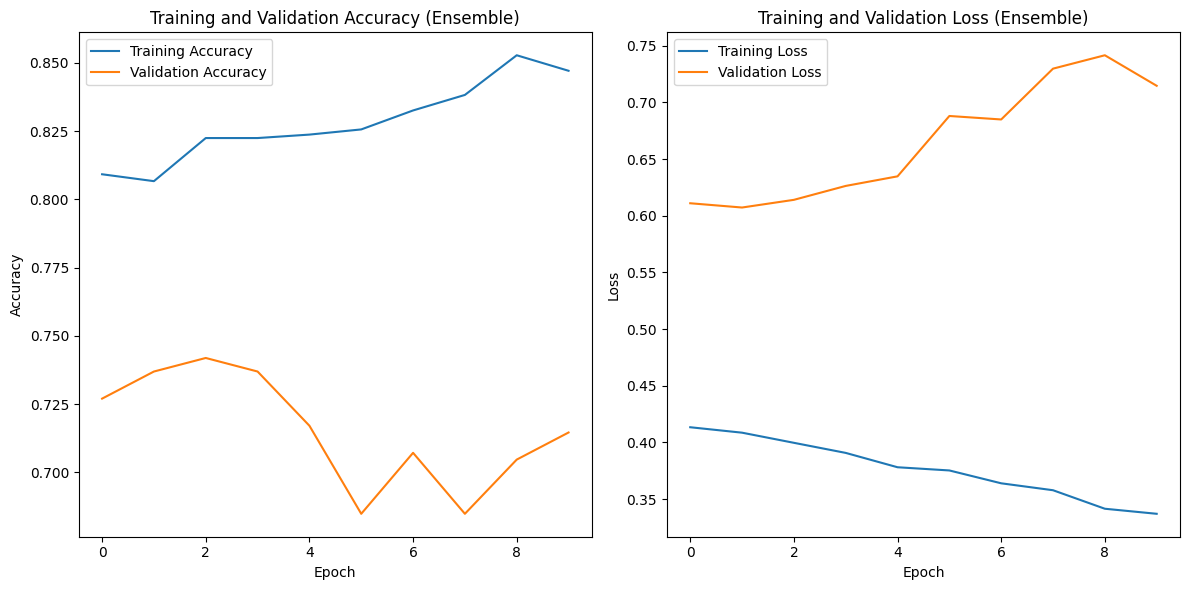

13/13 [==============================] - 1s 3ms/step


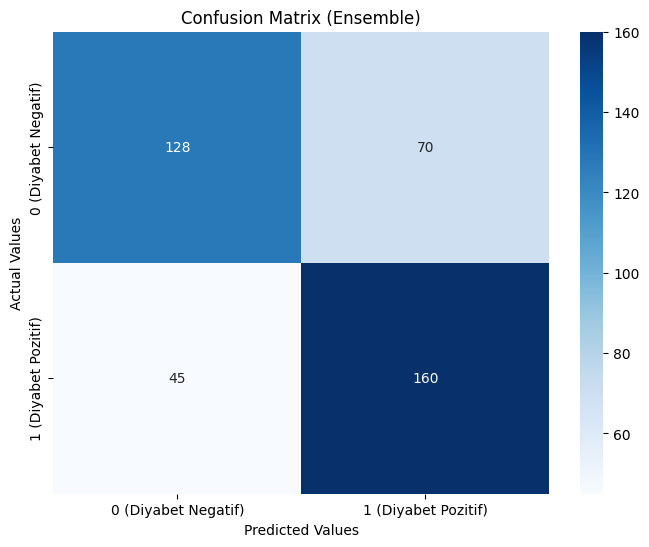

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       198
           1       0.70      0.78      0.74       205

    accuracy                           0.71       403
   macro avg       0.72      0.71      0.71       403
weighted avg       0.72      0.71      0.71       403



In [160]:
# Complex neural network architecture (Ensemble Learning)
# Define CNN model
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_resampled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Define LSTM model
lstm_model_ensemble = Sequential()
lstm_model_ensemble.add(LSTM(64, input_shape=(X_train_resampled.shape[1], 1)))

# Define GRU model
gru_model_ensemble = Sequential()
gru_model_ensemble.add(GRU(64, input_shape=(X_train_resampled.shape[1], 1)))

# Combine models in an ensemble
merged = concatenate([cnn_model.output, lstm_model_ensemble.output, gru_model_ensemble.output], axis=-1)

# Dense layers
merged = Dense(128, activation='relu')(merged)
output_layer = Dense(1, activation='sigmoid')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[cnn_model.input, lstm_model_ensemble.input, gru_model_ensemble.input], outputs=output_layer)
ensemble_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ensemble model
ensemble_model.fit(
    [X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))] * 3,
    y_train_resampled, epochs=10, batch_size=32
)

# Evaluate the ensemble model
ensemble_evaluation_1 = ensemble_model.evaluate(
    [X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1))] * 3,
    y_test_resampled
)

print("\nEnsemble Model:")
print("Accuracy:", ensemble_evaluation_1[1])

# Train the ensemble model and store the training history
history_ensemble_1 = ensemble_model.fit(
    [
        X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1)),
        X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1)),
        X_train_resampled.reshape((X_train_resampled.shape[0], X_train_resampled.shape[1], 1))
    ],
    y_train_resampled, epochs=10, batch_size=32,
    validation_data=(
        [
            X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)),
            X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)),
            X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1))
        ],
        y_test_resampled
    )
)

# Visualize training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ensemble_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Ensemble)')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_ensemble_1.history['loss'], label='Training Loss')
plt.plot(history_ensemble_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Ensemble)')
plt.legend()

plt.tight_layout()
plt.show()

# Ensemble model predictions
y_pred_ensemble = (ensemble_model.predict(
    [
        X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)),
        X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1)),
        X_test_resampled.reshape((X_test_resampled.shape[0], X_test_resampled.shape[1], 1))
    ]
) > 0.5).astype(int)

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test_resampled, y_pred_ensemble)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix (Ensemble)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test_resampled, y_pred_ensemble))

<h2>Without SMOTE and ADASYN</h2>

<h2>KNN:</h2>

In [147]:
model_KNN_2 = KNeighborsClassifier()
history_KNN_2 = model_KNN_2.fit(X_train, y_train)
y_pred_KNN_2 = model_KNN_2.predict(X_test)
accuracy_KNN_2 = accuracy_score(y_test, y_pred_KNN_2)
print(classification_report(y_test, y_pred_KNN_2))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



<h2>Random Forest:</h2>

In [149]:
model_rf_2 = RandomForestClassifier()
history_rf_2 = model_rf_2.fit(X_train, y_train)
y_pred_rf_2 = model_rf_2.predict(X_test)
accuracy_rf_2 = accuracy_score(y_test, y_pred_rf_2)
print(classification_report(y_test, y_pred_rf_2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



<h2>XGBoost:</h2>

In [150]:
model_xgb_2 = XGBClassifier()
history_xgb_2 = model_xgb_2.fit(X_train, y_train)
y_pred_xgb_2 = model_xgb_2.predict(X_test)
accuracy_xgb_2 = accuracy_score(y_test, y_pred_xgb_2)
print(classification_report(y_test, y_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



<h2>LightGBM:</h2>

In [151]:
model_lgbm_2 = LGBMClassifier()
history_lgbm_2 = model_lgbm_2.fit(X_train, y_train)
y_pred_lgbm_2 = model_lgbm_2.predict(X_test)
accuracy_lgbm_2 = accuracy_score(y_test, y_pred_lgbm_2)
print(classification_report(y_test, y_pred_lgbm_2))

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 668
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<h2>LSTM:</h2>

Epoch 1/10
20/20 [==============================] - 2s 22ms/step - loss: 0.7053 - accuracy: 0.4267 - val_loss: 0.6812 - val_accuracy: 0.6688
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6808 - val_loss: 0.6506 - val_accuracy: 0.7013
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 0.6954 - val_loss: 0.6229 - val_accuracy: 0.7208
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.6112 - accuracy: 0.7068 - val_loss: 0.5930 - val_accuracy: 0.7403
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5843 - accuracy: 0.7134 - val_loss: 0.5684 - val_accuracy: 0.7273
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5573 - accuracy: 0.7182 - val_loss: 0.5551 - val_accuracy: 0.7078
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5602 - accuracy: 0.7199 - val_loss: 0.5487 - val_accuracy: 0.7143
Epoch 8/10
20/20 [=

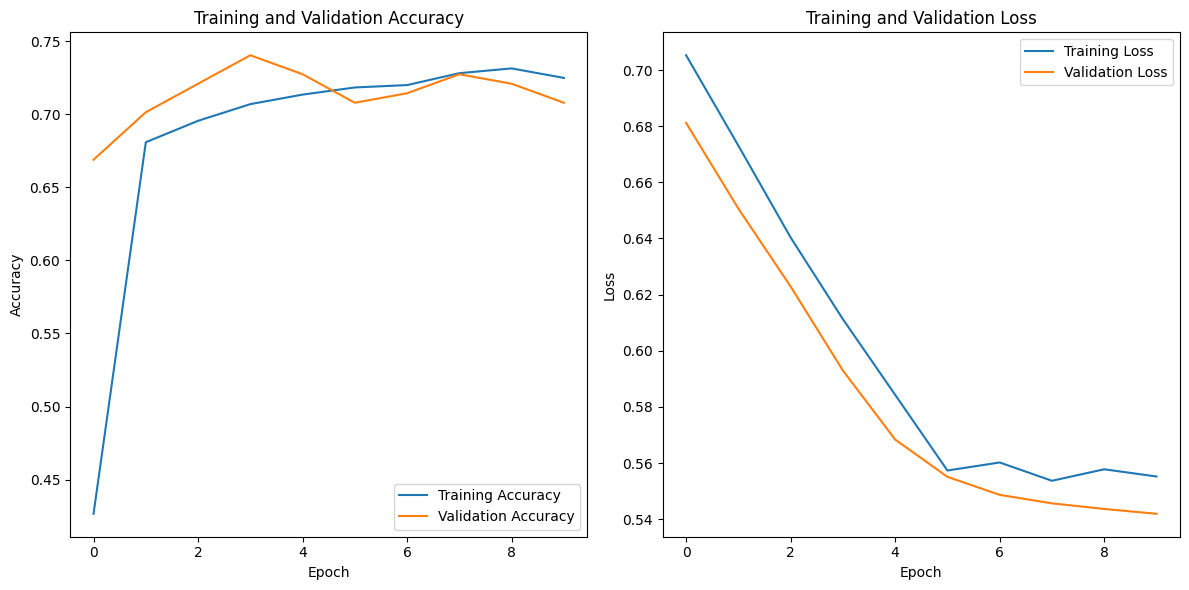

5/5 [==============================] - 0s 2ms/step
Accuracy: 0.7207792207792207


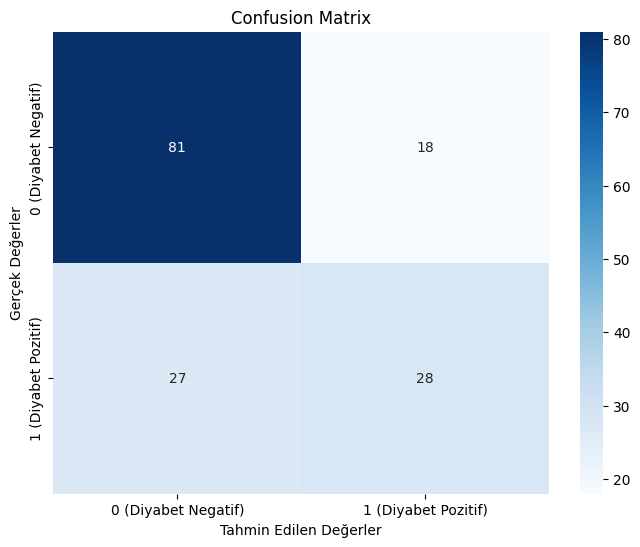

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        99
           1       0.61      0.51      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [157]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(16, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# L1 Regularization
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', loss_weights=[1.0, 0.01], metrics=['accuracy'])

# L2 Regularization
# lstm_model.compile(loss='binary_crossentropy', optimizer='adam', loss_weights=[1.0, 0.001], metrics=['accuracy'])

# Liste oluşturarak epoch sonuçlarını saklamak için
history = lstm_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), 
                         y_train, 
                         epochs=10, 
                         batch_size=32, 
                         validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Accuracy ve loss değerlerini çizmek için
plt.figure(figsize=(12, 6))

# Accuracy değerleri
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss değerleri
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# LSTM modelin tahminlerini alın
y_pred_lstm = (lstm_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1))) > 0.5).astype(int)

# Karmaşıklık matrisini oluşturun
cm = confusion_matrix(y_test, y_pred_lstm)

# Karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')

# Print Accuracy
accuracy_lstm_2 = accuracy_score(y_test, y_pred_lstm)
print("Accuracy:", accuracy_lstm2)
plt.show()
print(classification_report(y_test, y_pred_lstm))

<h2>GRU:</h2>

Epoch 1/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5522 - accuracy: 0.7313 - val_loss: 0.5413 - val_accuracy: 0.7013
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5503 - accuracy: 0.7313 - val_loss: 0.5404 - val_accuracy: 0.7013
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5425 - accuracy: 0.7182 - val_loss: 0.5393 - val_accuracy: 0.7078
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5520 - accuracy: 0.7248 - val_loss: 0.5386 - val_accuracy: 0.7078
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5469 - accuracy: 0.7264 - val_loss: 0.5384 - val_accuracy: 0.7078
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5433 - accuracy: 0.7280 - val_loss: 0.5376 - val_accuracy: 0.7143
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.5458 - accuracy: 0.7231 - val_loss: 0.5366 - val_accuracy: 0.7143
Epoch 8/10
20/20 [==

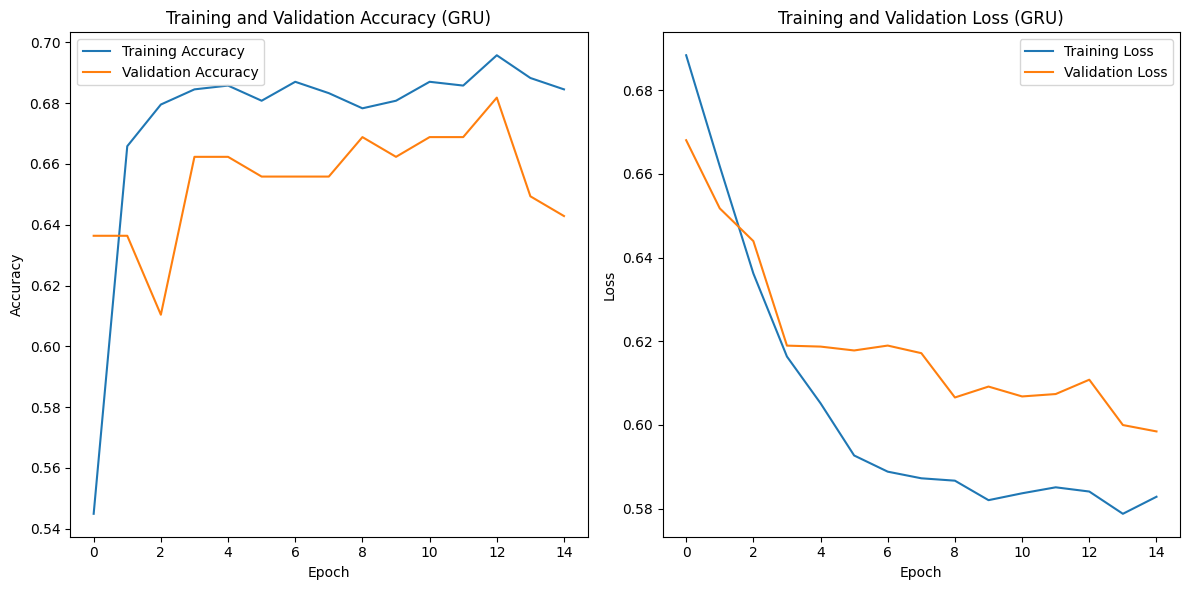

5/5 [==============================] - 0s 2ms/step


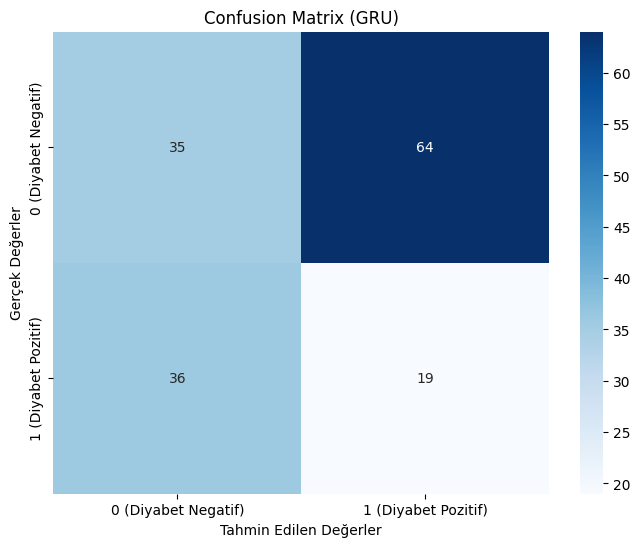


GRU Model:
Accuracy: 0.35064935064935066
              precision    recall  f1-score   support

           0       0.49      0.35      0.41        99
           1       0.23      0.35      0.28        55

    accuracy                           0.35       154
   macro avg       0.36      0.35      0.34       154
weighted avg       0.40      0.35      0.36       154



In [158]:
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(16, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

# L1 Regularization
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# L2 Regularization
# gru_model.compile(loss='binary_crossentropy', optimizer='adam', kernel_regularizer='l2', metrics=['accuracy'])

# Liste oluşturarak epoch sonuçlarını saklamak için
history = lstm_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),
                         y_train,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test))

# Accuracy ve loss değerlerini çizmek için
plt.figure(figsize=(12, 6))

# Accuracy değerleri
plt.subplot(1, 2, 1)
plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (GRU)')
plt.legend()

# Loss değerleri
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (GRU)')
plt.legend()

plt.tight_layout()
plt.show()

# GRU modelin tahminlerini alın
y_pred_gru = (gru_model.predict(X_test_scaled.reshape((X_test.shape[0], X_test.shape[1], 1))) > 0.5).astype(int)

# Karmaşıklık matrisini oluşturun
cm_gru = confusion_matrix(y_test, y_pred_gru)

# Karmaşıklık matrisini görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix (GRU)')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Gerçek Değerler')
plt.show()

accuracy_gru_2 = accuracy_score(y_test, y_pred_gru)
print("\nGRU Model:")
print("Accuracy:", accuracy_gru_2)
print(classification_report(y_test, y_pred_gru))

<h2>Ensemble Learning Model</h2>

Epoch 1/10
20/20 [==============================] - 3s 7ms/step - loss: 0.6129 - accuracy: 0.6743
Epoch 2/10
20/20 [==============================] - 0s 7ms/step - loss: 0.5179 - accuracy: 0.7329
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4930 - accuracy: 0.7508
Epoch 4/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4755 - accuracy: 0.7492
Epoch 5/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4711 - accuracy: 0.7557
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4698 - accuracy: 0.7541
Epoch 7/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4645 - accuracy: 0.7752
Epoch 8/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4594 - accuracy: 0.7655
Epoch 9/10
20/20 [==============================] - 0s 7ms/step - loss: 0.4658 - accuracy: 0.7638
Epoch 10/10
5/5 [==============================] - 1s 4ms/step - loss: 0.5130 - accuracy: 0.7143

Ensemble Model:
Accu

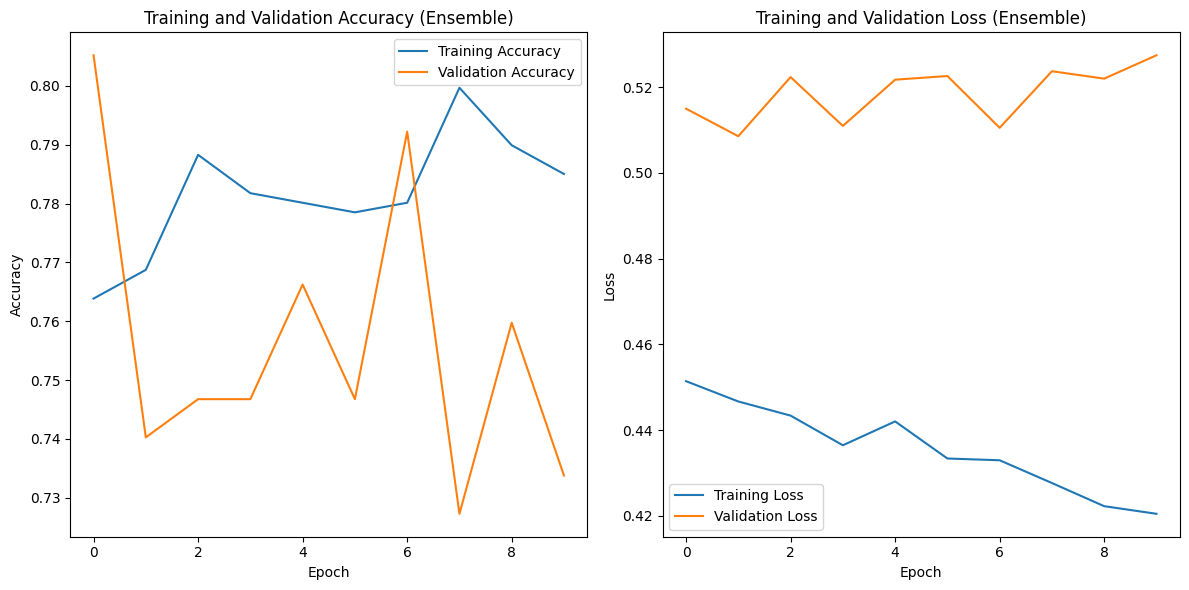

5/5 [==============================] - 0s 4ms/step - loss: 0.5275 - accuracy: 0.7338

Ensemble Model:
Accuracy: 0.7337662577629089
5/5 [==============================] - 1s 3ms/step


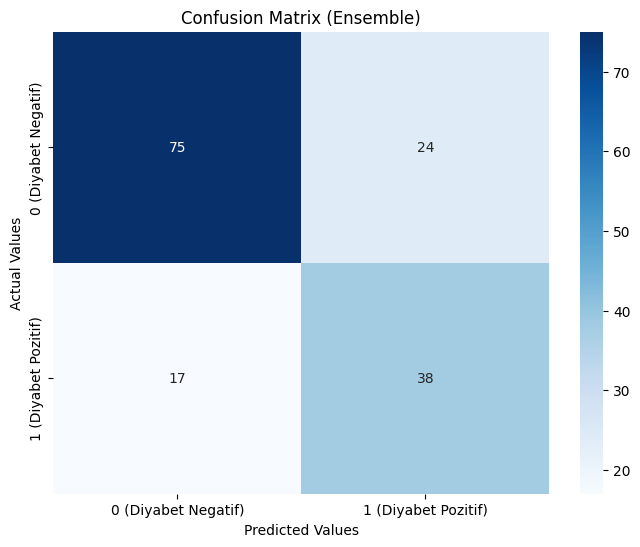

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        99
           1       0.61      0.69      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



In [159]:
# Complex neural network architecture (Ensemble Learning)
# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())

# Define LSTM model
lstm_model_ensemble = Sequential()
lstm_model_ensemble.add(LSTM(64, input_shape=(X_train.shape[1], 1)))

# Define GRU model
gru_model_ensemble = Sequential()
gru_model_ensemble.add(GRU(64, input_shape=(X_train.shape[1], 1)))

# Combine models in an ensemble
merged = concatenate([cnn_model.output, lstm_model_ensemble.output, gru_model_ensemble.output], axis=-1)

# Dense layers
merged = Dense(128, activation='relu')(merged)
output_layer = Dense(1, activation='sigmoid')(merged)

# Create the ensemble model
ensemble_model = Model(inputs=[cnn_model.input, lstm_model_ensemble.input, gru_model_ensemble.input], outputs=output_layer)
ensemble_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ensemble model
ensemble_model.fit(
    [
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    ],
    y_train, epochs=10, batch_size=32
)


# Evaluate the ensemble model
ensemble_evaluation = ensemble_model.evaluate(
    [
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    ],
    y_test
)

print("\nEnsemble Model:")
print("Accuracy:", ensemble_evaluation[1])

# Train the ensemble model and store the training history
history_ensemble = ensemble_model.fit(
    [
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1)),
        X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    ],
    y_train, epochs=10, batch_size=32,
    validation_data=(
        [
            X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
            X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
            X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
        ],
        y_test
    )
)

# Visualize training and validation accuracy/loss
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_ensemble.history['accuracy'], label='Training Accuracy')
plt.plot(history_ensemble.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Ensemble)')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_ensemble.history['loss'], label='Training Loss')
plt.plot(history_ensemble.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Ensemble)')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the ensemble model
ensemble_evaluation = ensemble_model.evaluate(
    [
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    ],
    y_test
)

print("\nEnsemble Model:")
print("Accuracy:", ensemble_evaluation[1])

# Ensemble model predictions
y_pred_ensemble = (ensemble_model.predict(
    [
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1)),
        X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    ]
) > 0.5).astype(int)

# Confusion Matrix
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'],
            yticklabels=['0 (Diyabet Negatif)', '1 (Diyabet Pozitif)'])
plt.title('Confusion Matrix (Ensemble)')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()
print(classification_report(y_test, y_pred_ensemble))

<h2>Comparison:</h2>

In [163]:
from IPython.display import display


model_names = ['KNN', 'Random Forest', 'XGBoost', 'LightGBM', 'LSTM', 'GRU', 'Ensemble Learning Model']

accuracy_values = [(accuracy_KNN_1 * 100), (accuracy_rf_1 * 100),
                          (accuracy_xgb_1 * 100), (accuracy_lgbm_1 * 100),
                          (accuracy_lstm_1 * 100), (accuracy_gru_1 * 100), (ensemble_evaluation_1[1] * 100)]

comparison_table_1 = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values
})

accuracy_values_2 = [(accuracy_KNN_2 * 100), (accuracy_rf_2 * 100),
                          (accuracy_xgb_2 * 100), (accuracy_lgbm_2 * 100),
                          (accuracy_lstm_2 * 100), (accuracy_gru_2 * 100), (ensemble_evaluation[1] * 100)]

comparison_table_2 = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_values_2
})

combined_2 = pd.merge(comparison_table_1, comparison_table_2, on='Model', suffixes=(' with Smote and Adasyn', ' without Smote and Adasyn'))

display(combined_2)

,Model,Accuracy with Smote and Adasyn,Accuracy without Smote and Adasyn
0,KNN,68.238213,69.480519
1,Random Forest,74.689826,76.623377
2,XGBoost,76.426799,70.779221
3,LightGBM,75.930521,70.779221
4,LSTM,68.982630,70.779221
5,GRU,59.057072,35.064935
6,Ensemble Learning Model,69.975185,73.376626
